<a href="https://colab.research.google.com/github/RMartinod/Computer-Graphics-Using-Python/blob/main/Chapter17_Build_your_own_curve_in_3D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Figure 17-4. u^3 symetric function.**

(Text(0.5, 0, 'u'), Text(0, 0.5, 'Blending weight, Bi(u)'), None)

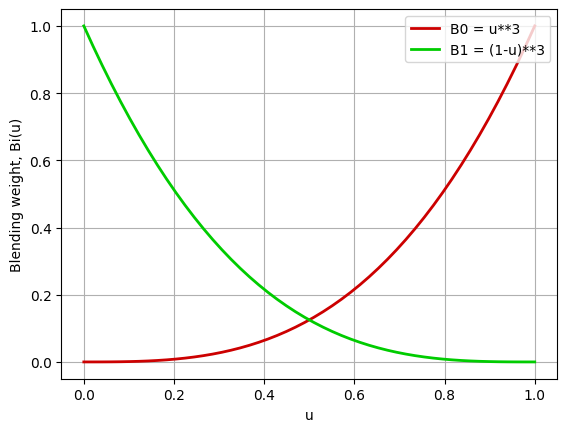

In [ ]:
import numpy as np, matplotlib.pyplot as plt
u = np.linspace(0,1,50)
B0 = u**3
B1 = (1-u)**3
plt.plot(u,B0,color=[.8,0,0],linewidth=2,label='B0 = u**3')
plt.plot(u,B1,color=[0,.8,0],linewidth=2,label='B1 = (1-u)**3')
plt.legend(loc='upper right'), plt.grid()
plt.xlabel('u'), plt.ylabel('Blending weight, Bi(u)')

**Figure 17-5. -3u^3+2u^2+u symetric function.**

(Text(0.5, 0, 'u'), Text(0, 0.5, 'Blending weight, Bi(u)'), None)

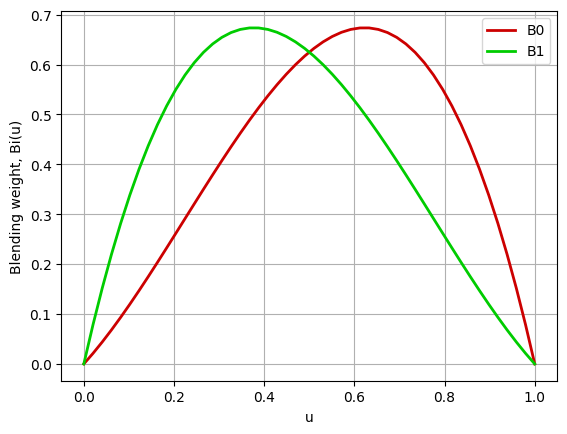

In [ ]:
import numpy as np, matplotlib.pyplot as plt
u = np.linspace(0,1,50)
B0 = -3*u**3 + 2*u**2 + u
B1 = -3*(1-u)**3 + 2*(1-u)**2 + (1-u)
plt.plot(u,B0,color=[.8,0,0],linewidth=2,label='B0')
plt.plot(u,B1,color=[0,.8,0],linewidth=2,label='B1')
plt.legend(loc='upper right'), plt.grid()
plt.xlabel('u'), plt.ylabel('Blending weight, Bi(u)')

**Quick project**

We want to interpolate a set of 4-control points (p_0, p_1, p_2, p_3). Thus, we define two crazy weight functions (B_0 and B_2); and then, we define the weight functions B_3 and B_1 as the symmetric function of B_0 and B_2, respectively

**Figure 17-6. Crazy weight functions.**

(Text(0.5, 0, 'u'), Text(0, 0.5, 'Blending weight, Bi(u)'), None)

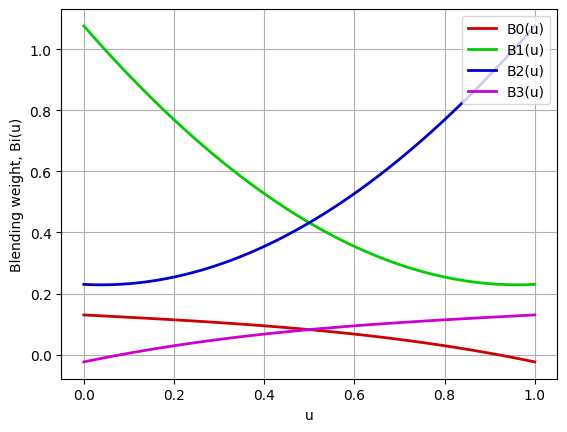

In [ ]:
import numpy as np, matplotlib.pyplot as plt
u = np.linspace(0,1,50)
B0 = -u**3/13 - u/13 + 0.13
B1 = -(1-u)**3/13 - (1-u)/13 + (1-u)**2 + 0.23
B2 = -u**3/13 - u/13 + u**2 + 0.23
B3 = -(1-u)**3/13 - (1-u)/13 + 0.13
plt.plot(u,B0,color=[.8,0,0],linewidth=2,label='B0(u)')
plt.plot(u,B1,color=[0,.8,0],linewidth=2,label='B1(u)')
plt.plot(u,B2,color=[0,0,.8],linewidth=2,label='B2(u)')
plt.plot(u,B3,color=[.8,0,.8],linewidth=2,label='B3(u)')
plt.legend(loc='upper right'), plt.grid()
plt.xlabel('u'), plt.ylabel('Blending weight, Bi(u)')

We will interpolate 11 control points by means our crazy curve applying the process of piecewise curve learned from spline by stages

In [ ]:
import numpy as np, plotly.express as px
v = np.linspace(0,np.pi,11)
X = np.array([np.cos(v)*np.sin(v)]).reshape(-1,1)
Y = np.array([np.cos(v)]).reshape(-1,1)
Z = np.array([np.sin(v)]).reshape(-1,1)
Qk = np.concatenate((X,Y,Z), axis=1)
u  = np.transpose(np.linspace(0,1,50).reshape(1, -1))
Uk = np.concatenate((u**3, u**2, u,np.ones(np.shape(u))), axis=1)
Mk = (1/13)*np.array([[-1, 1,-1, 1], [0,10,13,-3], [-1,-22,-1,4], [1.69,13.99,2.99,-0.31]])
pu = np.zeros((len(u)*(len(Qk)-4+1),3))
for i in range (len(Qk)-4+1):
  QkStage = Qk[i:i+4,:]
  puStage = Uk @ Mk @ QkStage
  pu[len(u)*i:len(u)*(i+1),0:3] = puStage
fig = px.line_3d(x=Qk[:,0], y=Qk[:,1], z=Qk[:,2],line_dash=None,markers =True)
fig.add_trace(px.line_3d(x=pu[:,0], y=pu[:,1], z=pu[:,2]).data[0])
fig.update_traces(line_color='darkblue', line_width=4, marker_size=5)

Besides, we can interpolate a closed our crazy curve applying the process of piecewise closed spline curves.

In [1]:
import numpy as np, plotly.express as px
v = np.linspace(0,2*np.pi,17)
X = np.array([np.cos(v)]).reshape(-1,1)
Y = np.array([np.sin(v)]).reshape(-1,1)
Z = 2*Y**2
Qk = np.concatenate((X,Y,Z), axis=1)
p0 = np.array([Qk[0,0],Qk[0,1],Qk[0,2]]).reshape(1,-1)
p1 = np.array([Qk[1,0],Qk[1,1],Qk[1,2]]).reshape(1,-1)
p2 = np.array([Qk[2,0],Qk[2,1],Qk[2,2]]).reshape(1,-1)
Qk = np.concatenate((Qk,p0,p1,p2))
u  = np.transpose(np.linspace(0,1,50).reshape(1, -1))
Uk = np.concatenate((u**3, u**2, u,np.ones(np.shape(u))), axis=1)
Mk = (1/13)*np.array([[-1, 1,-1, 1], [0,10,13,-3], [-1,-22,-1,4], [1.69,13.99,2.99,-0.31]])
pu = np.zeros((len(u)*(len(Qk)-4+1),3))
for i in range (len(Qk)-4+1):
  QkStage = Qk[i:i+4,:]
  puStage = Uk @ Mk @ QkStage
  pu[len(u)*i:len(u)*(i+1),0:3] = puStage
pu[-1,0:3] = pu[0,0:3]
fig = px.line_3d(x=Qk[:,0], y=Qk[:,1], z=Qk[:,2],line_dash=None,markers =True)
fig.add_trace(px.line_3d(x=pu[:,0], y=pu[:,1], z=pu[:,2]).data[0])
fig.update_traces(line_color='darkgreen', line_width=4, marker_size=5)